In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import json
import pandas as pd
import numpy as np
import seaborn as sns

# Generate Random Blobs

In [65]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=4)
X.shape, y.shape

((1000, 2), (1000,))

/home/arnab/anaconda3/envs/eye/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

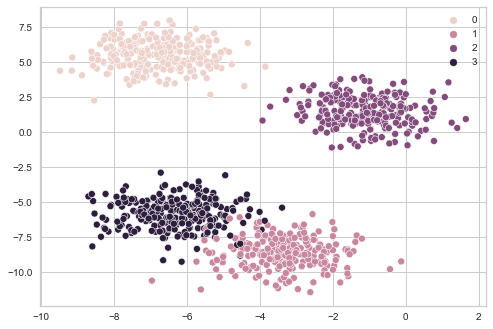

In [15]:
sns.scatterplot(X[:,0], X[:,1], hue=y)

# Load gaze data

In [24]:
with open("saved_gazedata/gaze_2021-08-05T22:26:59.018878.json") as f:
    data = json.load(f)

In [25]:
X = []
for d in data:
    for i in range(d["value"]):
        cord = [d["x"], d["y"]]
        X.append(cord)
X = np.array(X)
X.shape

(72, 2)

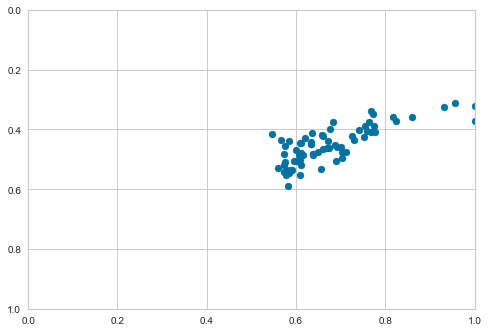

In [26]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim([0,1])
plt.ylim([0,1])
plt.gca().invert_yaxis()

# DBSCAN

## limiation: Assumes uniform density among all the clusters

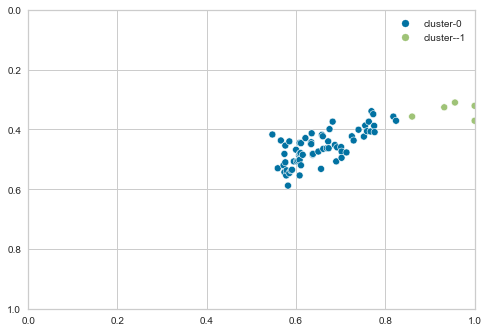

In [31]:
model = DBSCAN(eps=0.07034912934784618, min_samples=10).fit(X)
labels = model.labels_

ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue=["cluster-{}".format(x) for x in labels])
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.invert_yaxis()

In [32]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters: ", n_clusters_)
for cluster in range(n_clusters_):
    print("cluster {} => number of points: {}".format(cluster, list(labels).count(cluster)))
n_noise_ = list(labels).count(-1)
print("Noise points: ", n_noise_)

Number of clusters:  1
cluster 0 => number of points: 67
Noise points:  5


In [33]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

print("Silhouette: ", silhouette_score(X, labels))
print("Calinski-Harabasz: ", calinski_harabasz_score(X, labels))
print("Davies-Bouldin: ", davies_bouldin_score(X, labels))

Silhouette:  0.6237006460804453
Calinski-Harabasz:  60.86779299522772
Davies-Bouldin:  0.40154047293861006


Silhouette:  0.27606541781060273 <br>
Calinski-Harabasz:  6.612921286380399 <br>
Davies-Bouldin:  2.4544863369203855

# Tuning EPS

(72, 11) (72, 11)


Text(0, 0.5, 'Distance')

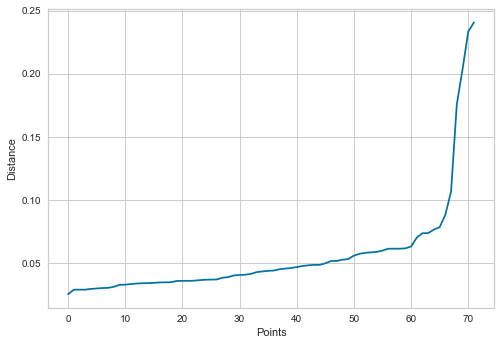

In [29]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
print(distances.shape, indices.shape)
dist = np.sort(distances[:,10])

plt.plot(dist)
plt.xlabel("Points")
plt.ylabel("Distance")

61 0.07034912934784618


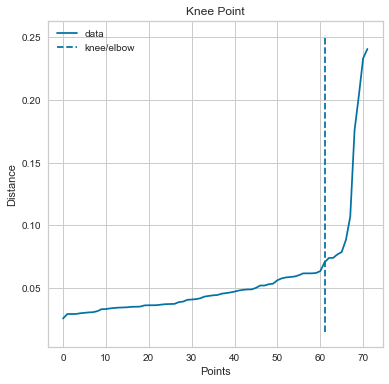

In [30]:
from kneed import KneeLocator
i = np.arange(len(dist))
kneedle = KneeLocator(i, dist, S=1, curve='convex', direction='increasing', interp_method='polynomial')

kneedle.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(kneedle.knee, dist[kneedle.knee])

In [ ]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    print(eps)
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 1)), fontsize=25, ha="center")
    sns.scatterplot(x = X[:,0], y = X[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1